In [1]:
import matplotlib.pyplot as plt
import json

import os
import numpy as np

In [2]:
record_root_path = "./baseline/output/submissions/"

In [21]:
# read json file in
model_name = "bert-base-chinese"

with open(record_root_path+model_name+"/train_metrics.json", 'r', encoding='utf-8') as reader:
    train_metrics = json.load(reader)    
with open(record_root_path+model_name+"/dev_metrics.json", 'r', encoding='utf-8') as reader:
    dev_metrics = json.load(reader)    
with open(record_root_path+model_name+"/train_epoch_losses.json", 'r', encoding='utf-8') as reader:
    train_losses = json.load(reader)    
with open(record_root_path+model_name+"/dev_epoch_losses.json", 'r', encoding='utf-8') as reader:
    dev_losses = json.load(reader)    

In [17]:
def draw_metrics_plot(title, train_metrics, dev_metrics, metric_name):
    answer_train_list = []
    answer_dev_list = []
    sp_train_list = []
    sp_dev_list = []
    joint_train_list = []
    joint_dev_list = []

    sp_metric_name = 'sp_'+metric_name
    joint_metric_name = 'joint_'+metric_name
    
    for key, value in train_metrics.items():
        answer_train_list.append(value[metric_name])
        sp_train_list.append(value[sp_metric_name])
        joint_train_list.append(value[joint_metric_name])
    for key, value in dev_metrics.items():
        answer_dev_list.append(value[metric_name])
        sp_dev_list.append(value[sp_metric_name])
        joint_dev_list.append(value[joint_metric_name])

    x = [i for i in range(len(train_metrics))]
    plt.figure()
    plt.figure(figsize=(15,10))
    plt.xticks(x)
    
    plt.plot(x, answer_train_list, linestyle='-', marker='D', label='train_'+metric_name)
    plt.plot(x, sp_train_list, linestyle='-', marker='o', label='train_'+sp_metric_name)
    plt.plot(x, joint_train_list, linestyle='-', marker='P', label='train_'+joint_metric_name)
    
    plt.plot(x, answer_dev_list, linestyle='--', marker='D', label='dev_'+metric_name)
    plt.plot(x, sp_dev_list, linestyle='--', marker='o', label='dev_'+sp_metric_name)
    plt.plot(x, joint_dev_list, linestyle='--', marker='P', label='dev_'+joint_metric_name)

    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel("Score")
    plt.title(title)

<Figure size 640x480 with 0 Axes>

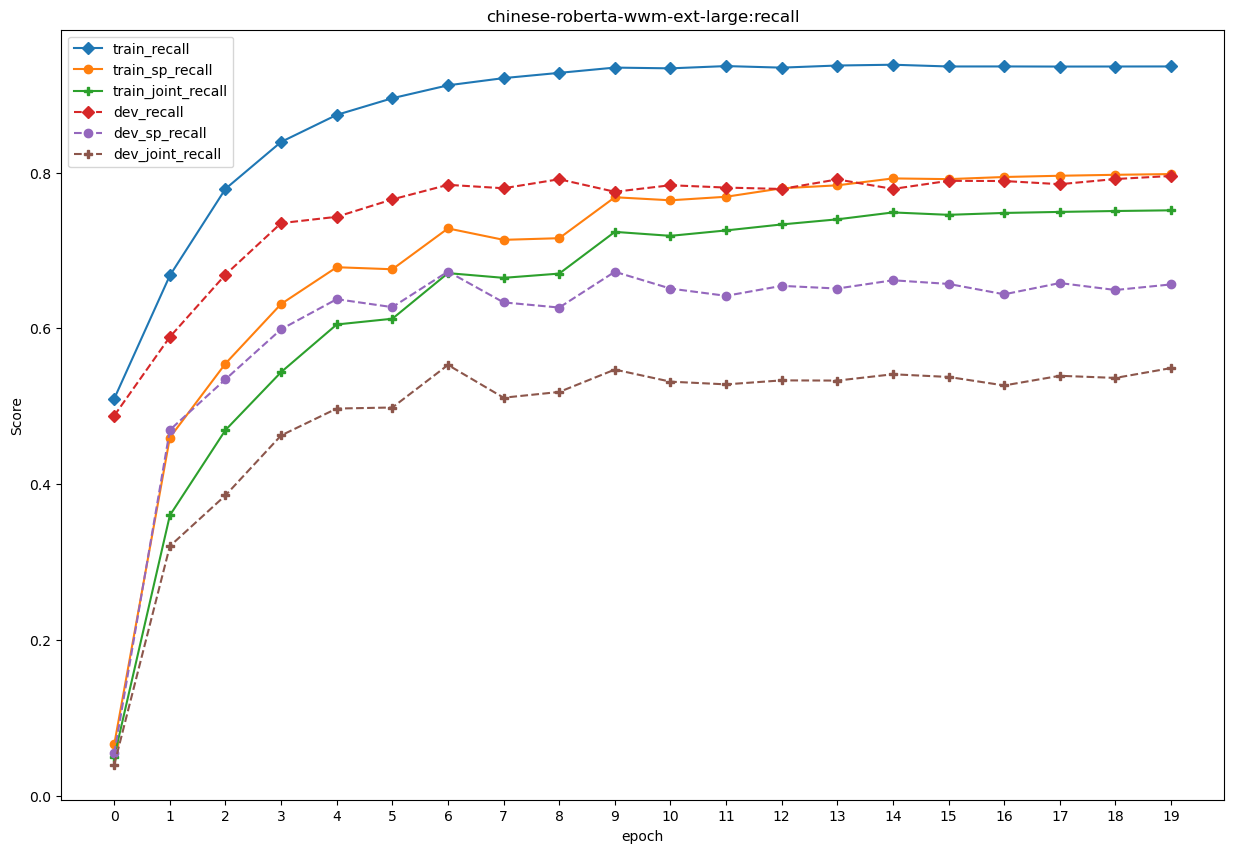

In [8]:
draw_metrics_plot(model_name+":"+"recall", train_metrics, dev_metrics, 'recall')

In [6]:
# draw loss curves

In [9]:
def fix_nans(data):
    nansIndx = np.where(np.isnan(data))[0]
    isanIndx = np.where(~np.isnan(data))[0]
    for nan in nansIndx:
        replacementCandidates = np.where(isanIndx>nan)[0]
        if replacementCandidates.size != 0:
            replacement = data[isanIndx[replacementCandidates[0]]]
        else:
            replacement = data[isanIndx[np.where(isanIndx<nan)[0][-1]]]
        data[nan] = replacement

def get_steps_mean_loss(data, step_size):
    epoch_loss = []
    steps = len(data)

    i = 0
    while i+step_size<=steps:
        if i+step_size>steps:
            loss = sum(data[i:-1])
        else:
            loss = sum(data[i:i+step_size])
        epoch_loss.append(loss/step_size)

        i += step_size

    return epoch_loss

In [10]:
def draw_loss_plot(title, losses):
    markers = ['D', 'o', 'P', '+']
    
    x = [i*50 for i in range(len(losses['loss'])//50)]  # 100 for train
    plt.figure()
    plt.figure(figsize=(15,10))
    plt.xticks(np.arange(1,x[-1],step=500))

    i = 0
    for key, value in losses.items():
        fix_nans(value)
        print(np.argmin(losses['loss']))
        mean_losses = get_steps_mean_loss(value, 50)
        plt.plot(x, mean_losses, linestyle='-', marker=markers[i], label=key)
        i += 1

    plt.legend()
    plt.xlabel('steps')
    plt.ylabel("Loss")
    plt.title(title)
        

11038
11038
11038
11038


<Figure size 640x480 with 0 Axes>

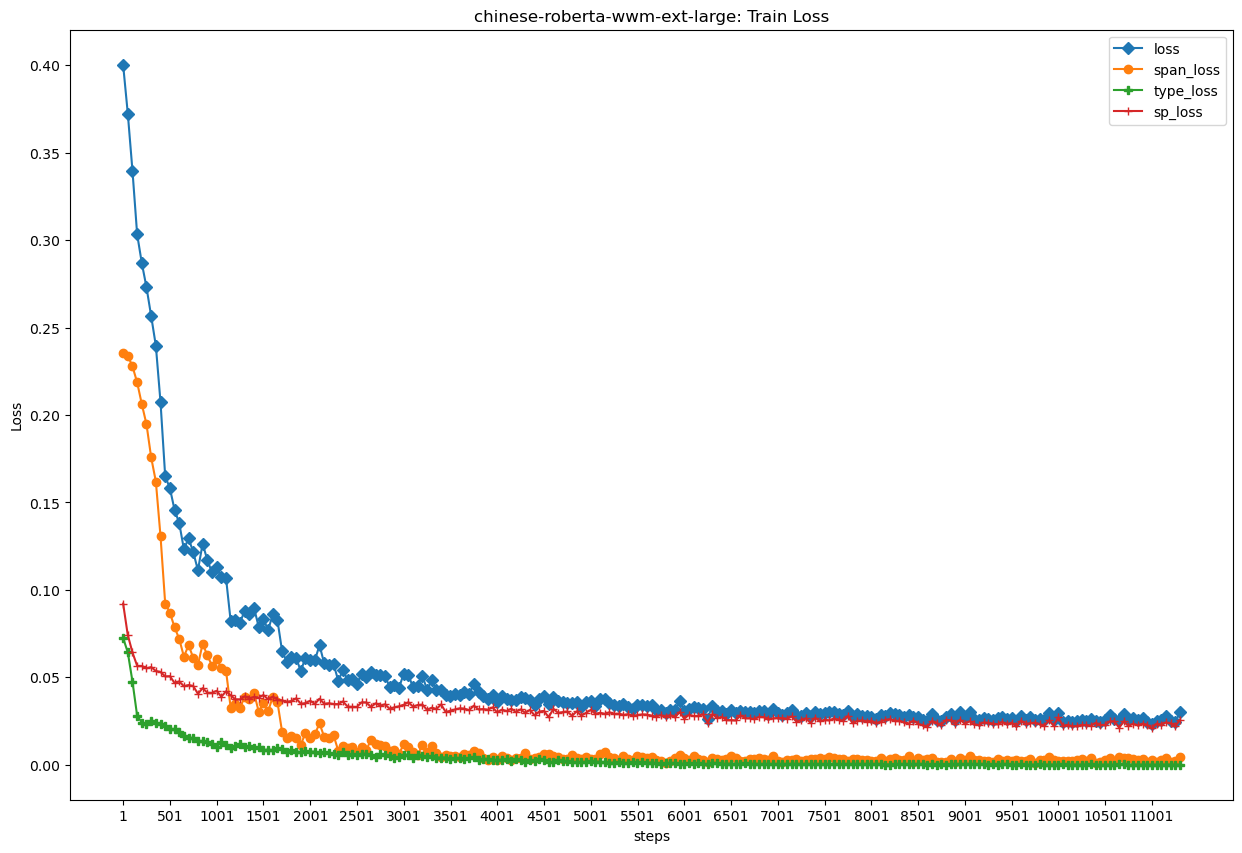

In [12]:
draw_loss_plot(model_name+": Train Loss", train_losses)

In [ ]:
# get the metrics when the joint f1 reaches the highest

In [13]:
train_metrics

{'1': {'em': 0.39920861727852275,
  'f1': 0.5046331900249127,
  'precision': 0.5230818624476574,
  'recall': 0.5097211875985342,
  'sp_em': 0.14684546054077818,
  'sp_f1': 0.08712188619860659,
  'sp_precision': 0.1418223785447351,
  'sp_recall': 0.0658836583655225,
  'joint_em': 0.003297428006155199,
  'joint_f1': 0.0653438255607262,
  'joint_precision': 0.11348261863072813,
  'joint_recall': 0.04980337724611385},
 '2': {'em': 0.5869421850956255,
  'f1': 0.6679051511557339,
  'precision': 0.6963006284890222,
  'recall': 0.667797874139271,
  'sp_em': 0.22928116069465818,
  'sp_f1': 0.5081607298687999,
  'sp_precision': 0.6425185022349216,
  'sp_recall': 0.45981953124182295,
  'joint_em': 0.13167729171246428,
  'joint_f1': 0.39811314880623305,
  'joint_precision': 0.5279408008385531,
  'joint_recall': 0.35992997347181394},
 '3': {'em': 0.7199384480105517,
  'f1': 0.7836026778061089,
  'precision': 0.8056311992396851,
  'recall': 0.7790545348161602,
  'sp_em': 0.3288634864805452,
  'sp_f1

In [14]:
def get_best_metric(train_metrics, dev_metrics):
    joint_f1_scores = []
    for key, value in dev_metrics.items():
        joint_f1_scores.append(value['joint_f1'])

    index = np.argmax(joint_f1_scores)
    print(index)

    return train_metrics[str(index)], dev_metrics[str(index)]

In [22]:
get_best_metric(train_metrics, dev_metrics)

15


({'em': 0.882611562980875,
  'f1': 0.9005217759753464,
  'precision': 0.9382659901345327,
  'recall': 0.8965522942990973,
  'sp_em': 0.4548252363156738,
  'sp_f1': 0.6447072949765861,
  'sp_precision': 0.7222128882328901,
  'sp_recall': 0.6181251243078006,
  'joint_em': 0.41569575730929875,
  'joint_f1': 0.5820062468131479,
  'joint_precision': 0.6835573637178365,
  'joint_recall': 0.5563398928592388},
 {'em': 0.6408730158730159,
  'f1': 0.7273474745144678,
  'precision': 0.745343903230808,
  'recall': 0.7312254021615509,
  'sp_em': 0.32341269841269843,
  'sp_f1': 0.5636861815433246,
  'sp_precision': 0.6539682539682539,
  'sp_recall': 0.5371031746031745,
  'joint_em': 0.23015873015873015,
  'joint_f1': 0.41645967691936436,
  'joint_precision': 0.49053894463120634,
  'joint_recall': 0.4014386312030441})